In [2]:
import numpy as np
#import sep
import matplotlib.pyplot as plt
from astropy.io import fits

In [4]:
#imports data and chagnes it to a fomate that can be worked with
image1 = "hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"
image_hdu = fits.open(image1)
data_1 = image_hdu[0].data

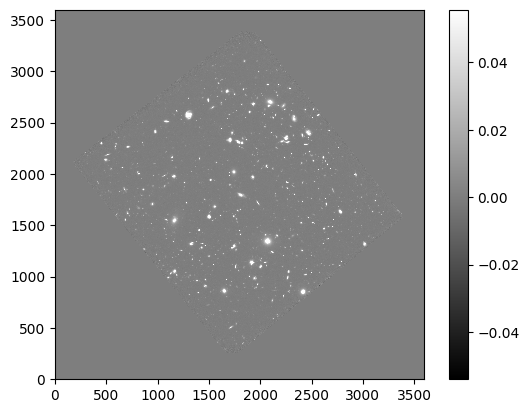

In [5]:
#calculating the mean and STD of the data and then graphing it
m, s = np.mean(data_1), np.std(data_1)
plt.imshow(data_1, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig('p2gray_map.png',dpi=600)

In [ ]:
#spatially measuring how much the background varries
bkg = sep.Background(data)

In [ ]:
#What is the 'global' mean and nocie of the BKG
print(bkg.globalback)
print(bkg.globalrms)

In [ ]:
#analyzing the background as a two-d array
kg_image = bkg.back()

In [ ]:
#ploting the background as a gray scale image
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('gray_back.png',dpi=600)

In [ ]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

In [ ]:
# ploting the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('back_noise.png',dpi=600)

In [ ]:
# subtract the background
data_sub = data - bkg

In [ ]:
#1.5 is a constent value for σ, where σ is the global background RMS.
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [6]:
#number of objects found
print(f"There are {len(objects)} objects in the image")

SyntaxError: unterminated string literal (detected at line 2) (209417605.py, line 2)

In [ ]:
from matplotlib.patches import Ellipse

# make a plot of background-subtracted data
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

#graph a ellipes over each found object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig('ojects_map.png',dpi=600)

In [ ]:
#available fields
object.dtype.name

In [ ]:
#flux, fluxerr and flag are 1-d arrays with one entry per object.
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],3.0, err=bkg.globalrms, gain=1.0)

In [ ]:
#print the first 10 objects results
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

In [ ]:
f,ax = plt.subplots(1,1,figsize=(7,7))
f = plt.hist(flux,y, bins=30)